In [1]:
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from lxml import etree
from datetime import datetime
import requests
import pandas as pd
import numpy as np
import threading
import time
import json
import asyncio

params = {
  'access_key': 'fc86254346a54a4fa6f26c220adbfab8'
}

header = {
    'user-agent': 'Mozilla/5.0'
}
yf.pdr_override()

<h2>Using the MarketStack API for financial data</h2>

In [2]:
api_result = requests.get('http://api.marketstack.com/v1/tickers/aapl/eod', params, headers=header)

api_response = api_result.json()

print(api_response)

{'pagination': {'limit': 100, 'offset': 0, 'count': 100, 'total': 251}, 'data': {'name': 'Apple Inc', 'symbol': 'AAPL', 'country': None, 'has_intraday': False, 'has_eod': True, 'eod': [{'open': 165.09, 'high': 165.39, 'low': 164.03, 'close': 165.23, 'volume': 38730570.0, 'adj_high': 165.39, 'adj_low': 164.03, 'adj_close': 165.23, 'adj_open': 165.09, 'adj_volume': 40713618.0, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'AAPL', 'exchange': 'XNAS', 'date': '2023-04-17T00:00:00+0000'}, {'open': 164.59, 'high': 166.32, 'low': 163.82, 'close': 165.21, 'volume': 49337200.0, 'adj_high': 166.32, 'adj_low': 163.82, 'adj_close': 165.21, 'adj_open': 164.59, 'adj_volume': 49386480.0, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'AAPL', 'exchange': 'XNAS', 'date': '2023-04-14T00:00:00+0000'}, {'open': 161.63, 'high': 165.8, 'low': 161.44, 'close': 165.56, 'volume': 68445649.0, 'adj_high': 165.8, 'adj_low': 161.42, 'adj_close': 165.56, 'adj_open': 161.63, 'adj_volume': 68445649.0, 'split_facto

In [16]:
pd.DataFrame(api_response['data'])

,name,symbol,country,has_intraday,has_eod,eod
0,Apple Inc,AAPL,None,False,True,"{'open': 162.35, 'high': 162.36, 'low': 160.51..."
1,Apple Inc,AAPL,None,False,True,"{'open': 161.42, 'high': 162.03, 'low': 160.08..."
2,Apple Inc,AAPL,None,False,True,"{'open': 162.43, 'high': 164.9584, 'low': 162...."
3,Apple Inc,AAPL,None,False,True,"{'open': 164.74, 'high': 165.05, 'low': 161.8,..."
4,Apple Inc,AAPL,None,False,True,"{'open': 166.595, 'high': 166.83, 'low': 165.1..."
...,...,...,...,...,...,...
95,Apple Inc,AAPL,None,False,True,"{'open': 150.16, 'high': 150.37, 'low': 147.71..."
96,Apple Inc,AAPL,None,False,True,"{'open': 152.31, 'high': 152.7, 'low': 149.97,..."
97,Apple Inc,AAPL,None,False,True,"{'open': 146.43, 'high': 151.48, 'low': 146.15..."
98,Apple Inc,AAPL,None,False,True,"{'open': 149.13, 'high': 149.87, 'low': 147.29..."


<h3>Using AlphaVantage API for financial data</h3>

In [17]:
key = 'JVDFMPCOQDA66R41'

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey={key}'
r = requests.get(url)
data = r.json()

print(data)

import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo'
r = requests.get(url)
data = r.json()

print(data)

{'Information': 'Thank you for using Alpha Vantage! This is a premium endpoint. You may subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints'}
{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'IBM', '3. Last Refreshed': '2023-04-11', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-04-11': {'1. open': '130.5800', '2. high': '131.1050', '3. low': '130.1800', '4. close': '130.4200', '5. volume': '3092154'}, '2023-04-10': {'1. open': '129.8300', '2. high': '131.0800', '3. low': '129.2400', '4. close': '131.0300', '5. volume': '2614402'}, '2023-04-06': {'1. open': '132.1600', '2. high': '132.6000', '3. low': '130.3150', '4. close': '130.5000', '5. volume': '3050581'}, '2023-04-05': {'1. open': '131.3700', '2. high': '132.6100', '3. low': '131.3700', '4. close': '132.1400', '5. volume': '2898759'}, '2023-04-04': {'1. open': '131.9900',

In [18]:
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol=IBM&apikey={key}'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Weekly Prices (open, high, low, close) and Volumes', '2. Symbol': 'IBM', '3. Last Refreshed': '2023-04-11', '4. Time Zone': 'US/Eastern'}, 'Weekly Time Series': {'2023-04-11': {'1. open': '129.8300', '2. high': '131.1050', '3. low': '129.2400', '4. close': '130.4200', '5. volume': '5706556'}, '2023-04-06': {'1. open': '130.9700', '2. high': '132.6100', '3. low': '130.3150', '4. close': '130.5000', '5. volume': '13172262'}, '2023-03-31': {'1. open': '126.4700', '2. high': '131.4800', '3. low': '126.4700', '4. close': '131.0900', '5. volume': '20779522'}, '2023-03-24': {'1. open': '124.3100', '2. high': '127.2150', '3. low': '122.6000', '4. close': '125.2900', '5. volume': '20458253'}, '2023-03-17': {'1. open': '125.1500', '2. high': '128.1900', '3. low': '121.7100', '4. close': '123.6900', '5. volume': '66132690'}, '2023-03-10': {'1. open': '129.6400', '2. high': '130.8600', '3. low': '125.1300', '4. close': '125.4500', '5. volume': '20761401'}, '2023-0

In [19]:
data['Weekly Time Series']

{'2023-04-11': {'1. open': '129.8300',
  '2. high': '131.1050',
  '3. low': '129.2400',
  '4. close': '130.4200',
  '5. volume': '5706556'},
 '2023-04-06': {'1. open': '130.9700',
  '2. high': '132.6100',
  '3. low': '130.3150',
  '4. close': '130.5000',
  '5. volume': '13172262'},
 '2023-03-31': {'1. open': '126.4700',
  '2. high': '131.4800',
  '3. low': '126.4700',
  '4. close': '131.0900',
  '5. volume': '20779522'},
 '2023-03-24': {'1. open': '124.3100',
  '2. high': '127.2150',
  '3. low': '122.6000',
  '4. close': '125.2900',
  '5. volume': '20458253'},
 '2023-03-17': {'1. open': '125.1500',
  '2. high': '128.1900',
  '3. low': '121.7100',
  '4. close': '123.6900',
  '5. volume': '66132690'},
 '2023-03-10': {'1. open': '129.6400',
  '2. high': '130.8600',
  '3. low': '125.1300',
  '4. close': '125.4500',
  '5. volume': '20761401'},
 '2023-03-03': {'1. open': '131.4200',
  '2. high': '131.8700',
  '3. low': '127.7100',
  '4. close': '129.6400',
  '5. volume': '17865677'},
 '2023-

<h3>Yahoo Finance</h3>

In [2]:
sp500 = yf.Tickers('msft appl googg')

[*********************100%***********************]  1 of 1 completed


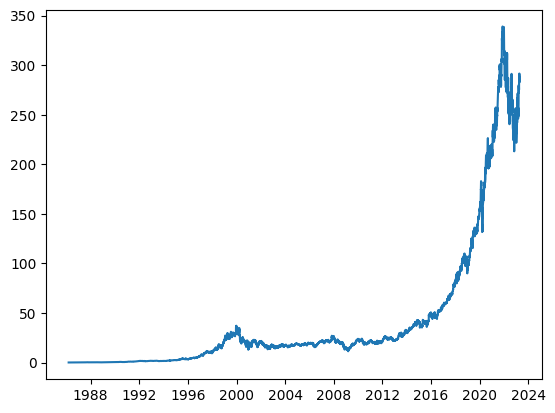

In [18]:
msft_all_data = pdr.get_data_yahoo('msft', start=datetime(1800, 1, 3))

plt.plot(msft_all_data['Adj Close'])

<h3>all sp500 stocks</h3>

In [2]:
all_tickers_xpath = '//span[text() = "S&P 500 component stocks"]/following::tbody[1]/tr/td[1]/a'
soup = BeautifulSoup(requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies', headers=header).content, 'html.parser')
dom = etree.HTML(str(soup))

In [3]:
# find all tickers
all_tickers = [i.text for i in dom.xpath(all_tickers_xpath)]

<h3>using yfinance to download all data together</h3>

In [5]:
def yfinance_get_data(tickers: list[str], start: datetime = datetime(2022, 1, 3)):
    return pdr.get_data_yahoo(' '.join(tickers), start=start)

In [6]:
async def get_all_data(tickers: list[str], split_fold: int = 5):
    loop = asyncio.get_event_loop()

    div, mod = divmod(len(tickers), split_fold)
    # split tickers for concurrency 
    split_tickers = [ tickers[i*div: i*div + div + 1] if (i == mod-1) else tickers[i*div: i*div + div + mod] for i in range(split_fold) ]
    
    return yfinance_get_data(split_tickers)


In [ ]:
data = yfinance_get_data(all_tickers, start = datetime(2021, 1, 1))

[****                   9%                       ]  44 of 503 completed

KeyboardInterrupt: 

[*********             19%                       ]  96 of 503 completed

In [ ]:
data

Adj Close                                              \
                     A     AAL         AAP        AAPL        ABBV   
Date                                                                 
2021-01-04  117.039719  15.130  149.533600  127.679985   95.901833   
2021-01-05  117.996643  15.430  149.372055  129.258606   96.893509   
2021-01-06  121.232384  15.520  158.001541  124.907562   96.056496   
2021-01-07  124.458290  15.380  159.351105  129.169785   97.084557   
2021-01-08  125.346138  15.130  161.622467  130.284698   97.594048   
...                ...     ...         ...         ...         ...   
2023-04-05  138.089996  13.890  120.209999  163.759995  160.800003   
2023-04-06  138.029999  14.010  120.690002  164.660004  161.550003   
2023-04-10  138.020004  14.150  120.389999  162.029999  161.279999   
2023-04-11  138.520004  14.320  122.180000  160.800003  161.380005   
2023-04-12  139.350006  13.035         NaN  161.350006  162.889999   

                                                                       ...  \
                   ABC         ABT       ACGL         ACN        ADBE  ...   
Date                                                                   ...   
2021-01-04   93.579849  105.199547  34.900002  248.901108  485.339996  ...   
2021-01-05   94.801720  106.501160  35.040001  250.318085  485.690002  ...   
2021-01-06  102.957222  106.279404  36.580002  253.054962  466.309998  ...   
2021-01-07  106.797394  107.311066  36.240002  255.442444  477.739990  ...   
2021-01-08  106.700417  107.609955  36.439999  256.374176  485.100006  ...   
...                ...         ...        ...         ...         ...  ...   
2023-04-05  167.360001  104.209999  68.589996  281.329987  382.019989  ...   
2023-04-06  166.350006  104.930000  68.940002  281.700012  380.600006  ...   
2023-04-10  166.380005  103.699997  68.650002  281.679993  376.250000  ...   
2023-04-11  166.550003  103.290001  69.010002  286.329987  371.109985  ...   
2023-04-12  166.190002  103.379997  70.470001  286.339996  372.537506  ...   

             Volume                                                         \
               WYNN      XEL       XOM     XRAY      XYL      YUM      ZBH   
Date                                                                         
2021-01-04  3596800  3197100  27764700  2214500   814700  2058200  1265870   
2021-01-05  1814600  1976800  44035100  3021700  1005200  1475300   998894   
2021-01-06  2433700  2667000  36484800  1774700  1015300  1352700  1424799   
2021-01-07  3846700  2630400  29528100  1334200  1539300  2222900  1237648   
2021-01-08  2812400  2221500  28628200  1336100  1632200  1252200  1259072   
...             ...      ...       ...      ...      ...      ...      ...   
2023-04-05  2356000  4231500  16479500  2608800  1947600  1212400  1064800   
2023-04-06  1390600  2476200  15778000  2465700  1260000  1080500   781000   
2023-04-10  1880900  1722400  13006600  1838000  1014400  1224800   791600   
2023-04-11  1628700  1956300  11755900  2211300  1347700  1113100  1327500   
2023-04-12  1053117  1005939   5899542   781081   530491   496136   762572   

                                      
              ZBRA     ZION      ZTS  
Date                                  
2021-01-04  432600  1625200  1805900  
2021-01-05  374700  1349500  1358600  
2021-01-06  419500  3269500  2139800  
2021-01-07  379900  2333900  1710700  
2021-01-08  348500  2201000  1475900  
...            ...      ...      ...  
2023-04-05  185400  9830300  1216200  
2023-04-06  184400  5853000  1594900  
2023-04-10  142800  3738400  1686100  
2023-04-11  138800  4393700  1197900  
2023-04-12   43008  1812098  1044992  

[572 rows x 3018 columns]

In [9]:
data.to_csv('stockdata.csv')

In [2]:
data = pd.read_csv('stockdata.csv')
above = [i.split('.')[0] for i in data.columns][1:]
below = data.iloc[0][1:]
data.set_index('Unnamed: 0', inplace=True)
data.columns = pd.MultiIndex.from_arrays([above, below])
data = data.drop('Date').rename_axis('Date')
data = data.iloc[1:,:]

C:\Users\abhin\AppData\Local\Temp\ipykernel_23428\1376863499.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

In [3]:
# pandas melt function details
'''
    i can simply stack and reset index to get all observations of the dataframe

'''

data = data.stack().reset_index().set_index('Date').rename(columns={'level_1': 'Ticker', 0: 'Ticker'})

C:\Users\abhin\AppData\Local\Temp\ipykernel_23428\3571682642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft['SMA-5'] = msft['Adj Close'].rolling(window = 5).mean()
C:\Users\abhin\AppData\Local\Temp\ipykernel_23428\3571682642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft['SMA-15'] = msft['Adj Close'].rolling(window = 15).mean()
C:\Users\abhin\AppData\Local\Temp\ipykernel_23428\3571682642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

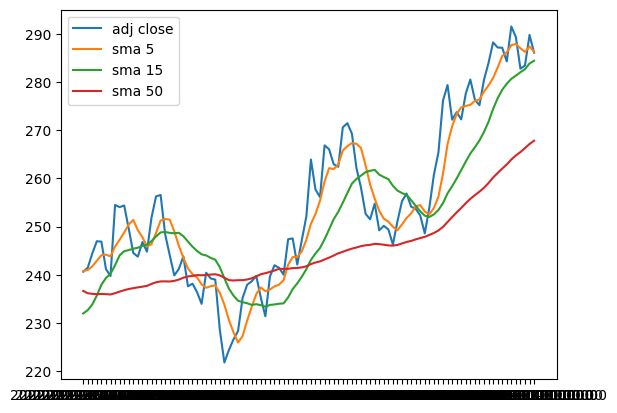

In [4]:
msft = data.query('Ticker == \'MSFT\'')
msft['SMA-5'] = msft['Adj Close'].rolling(window = 5).mean()
msft['SMA-15'] = msft['Adj Close'].rolling(window = 15).mean()
msft['SMA-50'] = msft['Adj Close'].rolling(window = 50).mean()

plt.plot(msft['Adj Close'][-100:])
plt.plot(msft['SMA-5'][-100:])
plt.plot(msft['SMA-15'][-100:])
plt.plot(msft['SMA-50'][-100:])
plt.legend(['adj close', 'sma 5', 'sma 15', 'sma 50'])

In [26]:
print(msft['Adj Close'])
msft['Adj Close'].ewm(span = 15, min_periods = 14).mean()

Date
2021-01-04 00:00:00    213.34202575683594
2021-01-05 00:00:00    213.54782104492188
2021-01-06 00:00:00     208.0106658935547
2021-01-07 00:00:00     213.9300537109375
2021-01-08 00:00:00     215.2334747314453
                              ...        
2023-04-05 00:00:00            284.339996
2023-04-06 00:00:00            291.600006
2023-04-10 00:00:00            289.390015
2023-04-11 00:00:00            282.829987
2023-04-12 00:00:00            286.179993
Name: Adj Close, Length: 572, dtype: object


Date
2021-01-04 00:00:00           NaN
2021-01-05 00:00:00           NaN
2021-01-06 00:00:00           NaN
2021-01-07 00:00:00           NaN
2021-01-08 00:00:00           NaN
                          ...    
2023-04-05 00:00:00    278.534304
2023-04-06 00:00:00    280.167517
2023-04-10 00:00:00    281.320329
2023-04-11 00:00:00    281.509036
2023-04-12 00:00:00    282.092906
Name: Adj Close, Length: 572, dtype: float64

In [27]:
msft['Adj Close'].rolling(window = 14).apply

<bound method Rolling.apply of Rolling [window=14,center=False,axis=0,method=single]>

In [30]:
data.agg(
    np.mean
)

In [29]:
pd.Series([1,2,3,4,5], index=[1,2,3,4,5]).ewm(span = 4, min_periods=2).mean()

1         NaN
2    1.666667
3    2.428571
4    3.266667
5    4.161290
dtype: float64

In [15]:
# trying to understand the exponential weighted mean

alpha = 0.5
period = 2
arr = [1,2,3,4,5,6,7,8,9,10]

def calculate_ema(arr, index, alpha, res):
    if not res:
        res.append(arr[index])
        calculate_ema(arr, index + 1, alpha, res)
    else:
        if index >= len(arr):
            return
        res.append( (1 - alpha) * res[-1] + alpha * arr[index] )
        calculate_ema(arr, index + 1, alpha, res)


def ema_value(arr, alpha):
    coefficients = [(1 - alpha) ** i for i in range(len(arr))]
    num = sum([coefficients[i] * arr[i] for i in range(len(arr))])
    denom = sum(coefficients)

    return num / denom if (denom != 0 and num != 0) else 0

def calculate_ema_adjusted(arr, alpha, span = 3):
    stack = arr[:span]
    res = []
    for i in range(span - 1, len(arr)):
        res.append(ema_value(stack, alpha = alpha))
        stack.pop(0)

    return res

rsi = []
calculate_ema(arr, 0, alpha, rsi)
rsi

[1,
 1.5,
 2.25,
 3.125,
 4.0625,
 5.03125,
 6.015625,
 7.0078125,
 8.00390625,
 9.001953125]

In [17]:
calculate_ema_adjusted([1,2,3,4], alpha = 0.5, span = 2)

IndexError: pop from empty list

In [58]:
pd.Series(arr, index = arr).ewm(alpha = 0.5, adjust = False).mean()

1     1.000000
2     1.500000
3     2.250000
4     3.125000
5     4.062500
6     5.031250
7     6.015625
8     7.007812
9     8.003906
10    9.001953
dtype: float64

In [50]:
rsi

[2, 2.5, 3.25, 4.125, 5.0625, 6.03125, 7.015625, 8.0078125, 9.00390625]

In [5]:
# i figured out a formula of means based on what probability
# stuff i learned before
weights = np.array([2**3, 2**2, 2**1, 2**0])
obs = np.array([4,3,2,1])

np.sum(obs * weights) / np.sum(weights)

3.2666666666666666

In [22]:
help(pd.Series.ewm)

Help on function ewm in module pandas.core.generic:

ewm(self, com: 'float | None' = None, span: 'float | None' = None, halflife: 'float | TimedeltaConvertibleTypes | None' = None, alpha: 'float | None' = None, min_periods: 'int | None' = 0, adjust: 'bool_t' = True, ignore_na: 'bool_t' = False, axis: 'Axis' = 0, times: 'str | np.ndarray | DataFrame | Series | None' = None, method: 'str' = 'single') -> 'ExponentialMovingWindow'
    Provide exponentially weighted (EW) calculations.
    
    Exactly one of ``com``, ``span``, ``halflife``, or ``alpha`` must be
    provided if ``times`` is not provided. If ``times`` is provided,
    ``halflife`` and one of ``com``, ``span`` or ``alpha`` may be provided.
    
    Parameters
    ----------
    com : float, optional
        Specify decay in terms of center of mass
    
        :math:`\alpha = 1 / (1 + com)`, for :math:`com \geq 0`.
    
    span : float, optional
        Specify decay in terms of span
    
        :math:`\alpha = 2 / (span + 1

In [ ]:
'''

    indicators to include: 
        - simple moving average
        - RSI 
        - MACD
    
'''

In [18]:
import pandas as pd

test = pd.DataFrame({'a': [1,2,3], 'b': [1,2,3]})

In [20]:
test.assign(n = [1,2,3])

,a,b,n
0,1,1,1
1,2,2,2
2,3,3,3


<h3>Using pushshift api to get reddit text data for sentiment analysis</h3>

In [5]:
# return before + after day of a certain datetime value 
def str_index_to_epoch(s: str) -> tuple[int, int]:
    s = s.split('-')
    print(s)
    yr = int(s[0])
    mo = int(s[1])
    day = int(s[2].split(' ')[0])

    print(yr, mo, day)
    # assuming 00:00:00 for the time of day
    return (int(datetime.datetime(yr, mo, day).timestamp()), int(datetime.datetime(yr, mo, day + 1).timestamp()))

In [6]:
req_stock_reference = requests.get('https://api.pushshift.io/reddit/search/comment/?q=MSFT|solid&subreddit=stocks&size=100&after=1609740000&before=1609826400')
reddit_data = json.loads(req_stock_reference.text)

In [8]:
pd.DataFrame(reddit_data['data'])['body'][0]

'NIO looks solid. I was in at $26 i think, i bought more today at 52. I think theyll be a spike after NIO day, im debating on to use my stimulus check to buy up even more nio before 01-09.'

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment_obj = SentimentIntensityAnalyzer()

In [12]:
sentiment_obj.polarity_scores(
    'NIO looks solid. I was in at $26 i think, i bought more today at 52. I think theyll be a spike after NIO day, im debating on to use my stimulus check to buy up even more nio before 01-09.'

)

{'neg': 0.0, 'neu': 0.962, 'pos': 0.038, 'compound': 0.1531}

In [55]:
data

NameError: name 'data' is not defined